In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [50]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(9, )),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [65]:
def neural_network(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=500, verbose=0)
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    metrics = {
        'history': history,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
    }
    return metrics

In [66]:
def train_network(person_id, model):
    train_df = pd.read_csv(f'Features/Training/training_{person_id:03}.csv')
    test_df = pd.read_csv(f'Features/Testing/testing_{person_id:03}.csv')
    X_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values
    X_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values
    
    return neural_network(model, X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 924us/step - loss: 0.1667 - acc: 1.0000
{'loss': [0.6868187785148621, 0.6827464699745178, 0.6790480017662048, 0.6752336621284485, 0.6722362637519836, 0.6700379252433777, 0.6685395240783691, 0.6674097180366516, 0.666506290435791, 0.6656453013420105, 0.664790689945221, 0.6640573143959045, 0.6631714105606079, 0.6626343727111816, 0.6624229550361633, 0.6622436046600342, 0.6619009971618652, 0.6613617539405823, 0.6606895327568054, 0.6598765254020691, 0.6590518355369568, 0.6582275032997131, 0.6573769450187683, 0.6564580798149109, 0.6554848551750183, 0.6544707417488098, 0.6535412669181824, 0.6526697278022766, 0.6519365906715393, 0.6513615250587463, 0.6507206559181213, 0.6500161290168762, 0.649237871170044, 0.6484431028366089, 0.6475759148597717, 0.6466376781463623, 0.6457052230834961, 0.644846498966217, 0.6440660357475281, 0.6432768702507019, 0.6424525380134583, 0.6415944695472717, 0.6407056450843811, 0.6398123502731323, 0.6389234662055969, 0.6380407214

<AxesSubplot:>

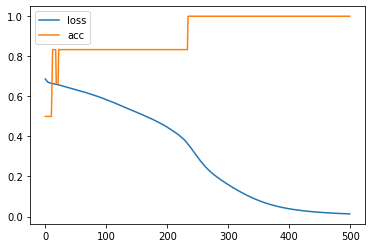

In [67]:
person3 = train_network(2, model)

print(person3['history'].history)
df = pd.DataFrame(person3['history'].history)
df.plot(y = ['loss', 'acc'])

In [68]:
total_train_acc = 0
total_train_loss = 0

total_test_acc = 0
total_test_loss = 0

for person_id in range(12):
    metrics = train_network(person_id+1, model)
    total_train_acc += metrics['train_accuracy']
    total_train_loss += metrics['train_loss']
    total_test_acc += metrics['test_accuracy']
    total_test_loss += metrics['test_loss']
    
print(total_train_acc / 12, total_train_loss / 12)
print(total_test_acc / 12, total_test_loss / 12)

1/1 [==============================] - 0s 829us/step - loss: 3.5535 - acc: 0.5000
0.9861111094554266 0.041326806686508157
0.75 1.8799134315922856


In [61]:
train_df = pd.read_csv(f'Features/Training/training_002.csv')
test_df = pd.read_csv(f'Features/Testing/testing_002.csv')
X_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values
X_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values

In [62]:
def svm_trainer(person_id, clf):
    train_df = pd.read_csv(f'Features/Training/training_{person_id:03}.csv')
    test_df = pd.read_csv(f'Features/Testing/testing_{person_id:03}.csv')
    X_train, y_train = train_df.iloc[:, :-1].values, train_df.iloc[:, -1].values
    X_test, y_test = test_df.iloc[:, :-1].values, test_df.iloc[:, -1].values
    
    return svm_classifier(clf, X_train, y_train, X_test, y_test)

In [63]:
def svm_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    training_accuracy = clf.score(X_train, y_train)
    testing_accuracy = clf.score(X_test, y_test)
    
    return training_accuracy, testing_accuracy

In [64]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

svm_total_train = 0
svm_total_test = 0

for person_id in range(12):
    training_accuracy, testing_accuracy = svm_trainer(person_id+1, clf)
    svm_total_train += training_accuracy
    svm_total_test += testing_accuracy
    
print(svm_total_train / 12, svm_total_test / 12)

1.0 0.9166666666666666
